## Q1. What is Ridge Regression, and how does it differ from ordinary least squares regression?

##
Ridge Regression, also known as L2 regularization, is a linear regression technique used to address multicollinearity (high correlation) between predictor variables and prevent overfitting in the model. In Ridge Regression, an L2 penalty term is added to the ordinary least squares (OLS) cost function to constrain the model's coefficients and prevent them from becoming too large.

Ordinary Least Squares (OLS) Regression:
OLS Regression is a linear regression method that aims to find the best-fitting line through the data by minimizing the sum of squared differences between the observed dependent variable (Y) and the predicted values (Y_hat). It does not include any regularization term and can be sensitive to multicollinearity when predictor variables are highly correlated.

Ridge Regression:
In Ridge Regression, the cost function is modified by adding an L2 regularization term that penalizes large coefficients. This regularization term is controlled by a hyperparameter called "alpha" (or "lambda"), which determines the strength of the regularization. As the value of alpha increases, the impact of the L2 penalty becomes stronger, and the model's coefficients are pushed towards zero.

The Ridge cost function is as follows:

Cost = Sum of Squared Errors + alpha * Sum of Squared Values of Coefficients

The regularization term, alpha * Sum of Squared Values of Coefficients, prevents the coefficients from taking large values, even in the presence of multicollinearity. Ridge Regression is particularly useful when dealing with datasets that have high collinearity between predictor variables.

In [1]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with noise (linear relationship)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Ridge regression model with alpha (regularization strength) = 1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model performance
mse = mean_squared_error(y_test, y_pred)

print("MSE (Ridge Regression):", mse)

MSE (Ridge Regression): 105.78604284136125


## Q2. What are the assumptions of Ridge Regression?

##
Ridge Regression, like ordinary least squares (OLS) regression, makes certain assumptions about the data to ensure the validity and accuracy of the model. The key assumptions of Ridge Regression are:

1. Linearity: Ridge Regression assumes that the relationship between the dependent variable (Y) and the predictor variables (X) is linear. The model seeks to fit a linear relationship between the variables.

2. Independence: The observations in the dataset should be independent of each other. There should be no autocorrelation between the residuals (errors) of the model.

3. Homoscedasticity: The variance of the residuals should be constant across all levels of the predictor variables. In other words, the spread of the residuals should be similar across the range of the predictor variables.

4. No Perfect Multicollinearity: Ridge Regression assumes that there is no perfect multicollinearity among the predictor variables. Perfect multicollinearity occurs when one predictor variable can be perfectly predicted from a linear combination of other predictor variables. Ridge Regression can handle multicollinearity to some extent, but it becomes more problematic as the multicollinearity gets stronger.

5. Normally Distributed Errors: The errors (residuals) of the model should be normally distributed. This assumption is important for conducting hypothesis tests and constructing confidence intervals.

In practice, it's essential to check these assumptions before applying Ridge Regression to a dataset. You can use diagnostic plots and statistical tests to assess the validity of the assumptions.

MSE (Ridge Regression): 105.78604284136125


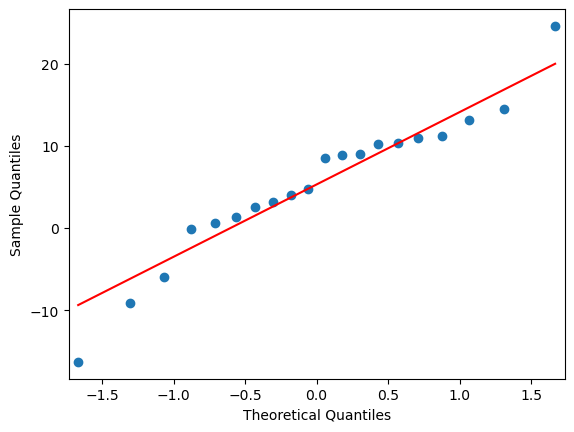

In [2]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Generate synthetic data with noise (linear relationship)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Ridge regression model with alpha (regularization strength) = 1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model performance
mse = np.mean((y_test - y_pred) ** 2)

# Check assumptions using residual plots
residuals = y_test - y_pred
fig = sm.qqplot(residuals, line='s')

print("MSE (Ridge Regression):", mse)

## Q3. How do you select the value of the tuning parameter (lambda) in Ridge Regression?

##
Selecting the value of the tuning parameter (lambda or alpha) in Ridge Regression is a critical step in achieving the best model performance. The value of lambda controls the strength of regularization, and different values can lead to different model complexities and performance. There are several methods to select the value of lambda in Ridge Regression:

1. Cross-Validation: One common approach is to use cross-validation to evaluate the model's performance for different values of lambda. You can divide the data into multiple folds, train the model on different subsets of the data, and then select the value of lambda that minimizes the average cross-validated error (e.g., Mean Squared Error or Mean Absolute Error).

2. Grid Search: Grid search is a systematic approach that involves specifying a range of lambda values and evaluating the model's performance for each value within the range. The value of lambda that gives the best performance on a validation set is selected as the optimal value.

3. RidgeCV: In scikit-learn, you can use the RidgeCV class, which performs cross-validated Ridge Regression using a range of alpha values. The class automatically selects the best alpha based on the specified scoring metric.

4. Bayesian Ridge Regression: Bayesian Ridge Regression uses Bayesian methods to estimate the hyperparameters, including the regularization parameter lambda. It can be useful when there is prior knowledge about the distribution of the parameters.

5. Regularization Path: Another approach is to compute the regularization path, which shows the behavior of coefficients for different values of lambda. By analyzing the regularization path, you can identify the range of lambda values where the coefficients stabilize.

In [3]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data with noise (linear relationship)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to try
alphas = np.logspace(-6, 6, 13)

# Initialize the RidgeCV model with cross-validation
ridge_cv_model = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the RidgeCV model to the data
ridge_cv_model.fit(X_train, y_train)

# Get the optimal alpha (lambda)
best_alpha = ridge_cv_model.alpha_

# Get the coefficients of the model for the best alpha
coefficients = ridge_cv_model.coef_

print("Optimal alpha (lambda):", best_alpha)
print("Coefficients for the best alpha:", coefficients)

Optimal alpha (lambda): 0.01
Coefficients for the best alpha: [44.23742047]


## Q4. Can Ridge Regression be used for feature selection? If yes, how?

##
Yes, Ridge Regression can be used for feature selection, although it may not perform as explicit feature selection methods like Lasso Regression (L1 regularization). Ridge Regression introduces a regularization term to the cost function, which helps in reducing the impact of multicollinearity and preventing overfitting. However, Ridge Regression does not set any coefficients exactly to zero unless the regularization parameter (lambda or alpha) becomes infinite.

While Ridge Regression does not perform feature selection by eliminating entire features from the model, it can still shrink the coefficients of less important features towards zero. Features with small coefficients are effectively penalized and have less impact on the predictions. As a result, Ridge Regression implicitly performs feature selection by reducing the contribution of less important features in the model.

If you have a large number of features or suspect that many of them are irrelevant or redundant, Ridge Regression with cross-validated regularization can be useful in identifying the most relevant features. By adjusting the value of the regularization parameter (lambda or alpha) during cross-validation, you can observe which features have consistently small coefficients across different values of lambda. Features with consistently small coefficients are less influential in the model and may be considered less important for prediction.

However, if you specifically want a model that sets some coefficients to exactly zero, you should consider using Lasso Regression (L1 regularization). Lasso is better suited for explicit feature selection, as it can force some features to be completely excluded from the model. If interpretability and a sparse model are crucial requirements, Lasso is a more appropriate choice.

Keep in mind that the choice between Ridge and Lasso depends on the specific objectives of the analysis and the underlying data characteristics. If feature selection is a primary concern and multicollinearity is not a significant issue, Lasso Regression is generally preferred. If multicollinearity is a concern, Ridge Regression can be a useful alternative, as it helps stabilize the model without discarding any features entirely.

## Q5. How does the Ridge Regression model perform in the presence of multicollinearity?

##
In the presence of multicollinearity, Ridge Regression can help stabilize the model and improve its performance compared to ordinary least squares (OLS) regression. Multicollinearity occurs when predictor variables are highly correlated with each other, which can lead to unstable coefficient estimates in OLS regression. Ridge Regression addresses this issue by introducing a regularization term that penalizes large coefficients, effectively reducing the impact of multicollinearity.

In [4]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with multicollinearity (highly correlated features)
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Introduce strong multicollinearity between the two features
X[:, 1] = X[:, 0] + 0.1 * np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Ridge regression model with alpha (regularization strength) = 1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model performance
mse = mean_squared_error(y_test, y_pred)

# Coefficients of the Ridge Regression model
coefficients = ridge_model.coef_

print("MSE (Ridge Regression):", mse)
print("Coefficients:", coefficients)

MSE (Ridge Regression): 6719.916891252493
Coefficients: [71.74088127 19.22561685]


## Q6. Can Ridge Regression handle both categorical and continuous independent variables?

##
Ridge Regression can handle both continuous and categorical independent variables, but some preprocessing is required to properly incorporate categorical variables into the model.

Handling Continuous Independent Variables:
For continuous independent variables, no special treatment is needed. You can directly include them in the feature matrix used for Ridge Regression.

Handling Categorical Independent Variables:
For categorical independent variables, they need to be converted into numerical representations before fitting the Ridge Regression model. Two common methods for handling categorical variables are:

One-Hot Encoding: One-hot encoding is a method to represent categorical variables as binary vectors. Each category in the original categorical variable is transformed into a separate binary feature, where a value of 1 represents the presence of that category, and 0 represents the absence. One-hot encoding ensures that the categorical variable is treated as nominal, and it avoids introducing any ordinal relationship between the categories.

Ordinal Encoding: Ordinal encoding is suitable for categorical variables with an inherent order or ranking. In this case, the categories are mapped to numerical values based on their order. However, ordinal encoding assumes an ordinal relationship between the categories, which may not always be appropriate.

After encoding the categorical variables, you can combine them with the continuous variables to create the feature matrix for Ridge Regression.

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Sample data with continuous and categorical variables
data = {
    'Age': [25, 30, 28, 22, 35],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Income': [50000, 60000, 55000, 48000, 70000],
    'Education': ['High School', 'Bachelor', 'Master', 'Bachelor', 'PhD'],
    'Score': [80, 90, 85, 75, 95]
}
df = pd.DataFrame(data)

# Separate target variable (y) and features (X)
y = df['Score']
X = df.drop('Score', axis=1)

# Preprocess categorical variables using one-hot encoding
cat_features = ['Gender', 'Education']
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cat_features)], remainder='passthrough')

# Create the Ridge Regression model pipeline
ridge_model = make_pipeline(preprocessor, Ridge(alpha=1.0))

# Fit the model
ridge_model.fit(X, y)

# Make predictions
y_pred = ridge_model.predict(X)

print("Predicted Scores:", y_pred)

Predicted Scores: [79.8397409  88.93258428 84.81846386 75.7546537  95.65455726]


## Q7. How do you interpret the coefficients of Ridge Regression?


##
In Ridge Regression, the interpretation of the coefficients is similar to that of ordinary least squares (OLS) regression, but with the influence of regularization due to the L2 penalty term. The coefficients represent the relationship between each independent variable and the dependent variable, taking into account the regularization effect to prevent overfitting.

Interpreting the coefficients in Ridge Regression involves considering the magnitude and sign of the coefficients:

Magnitude of Coefficients: The magnitude of the coefficients represents the strength of the relationship between the independent variable and the dependent variable. Larger magnitude coefficients indicate a stronger influence on the target variable. However, it's important to note that the Ridge regularization tends to shrink the coefficients towards zero, making them smaller compared to OLS regression.

Sign of Coefficients: The sign of the coefficients (positive or negative) indicates the direction of the relationship between the independent variable and the dependent variable. A positive coefficient suggests a positive correlation, meaning an increase in the independent variable tends to lead to an increase in the dependent variable. Conversely, a negative coefficient suggests a negative correlation, where an increase in the independent variable leads to a decrease in the dependent variable.

Comparing Relative Magnitudes: When interpreting coefficients, it's essential to consider their relative magnitudes. Coefficients with larger absolute values have a more substantial effect on the target variable compared to coefficients with smaller absolute values.

In [6]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data with noise (linear relationship)
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Ridge regression model with alpha (regularization strength) = 1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Get the coefficients of the Ridge Regression model
coefficients = ridge_model.coef_

print("Coefficients:", coefficients)

Coefficients: [84.97342091 72.791857  ]


## Q8. Can Ridge Regression be used for time-series data analysis? If yes, how?

##
Yes, Ridge Regression can be used for time-series data analysis, especially when dealing with time-series data that exhibit multicollinearity and require regularization to prevent overfitting. Ridge Regression can be applied to time-series data by considering lagged values of the target variable and other relevant features as predictors.

To use Ridge Regression for time-series data analysis in Python, follow these steps:

Prepare the Data: Organize the time-series data into a suitable format, where each row represents a specific time point, and the columns represent different features, including the lagged values of the target variable and other relevant predictors.

Train-Test Split: Split the time-series data into training and testing sets to evaluate the model's performance on unseen data. Ensure that the training set precedes the testing set chronologically.

Feature Engineering: Create lag features by shifting the target variable and other relevant predictors backward in time. For example, you can create lag features with different time lags to capture the historical values of the target variable.

Ridge Regression: Fit the Ridge regression model to the training data, considering the lag features and other predictors. The regularization parameter (alpha or lambda) should be chosen through cross-validation or other suitable methods.

Model Evaluation: Evaluate the performance of the Ridge Regression model on the test data using appropriate metrics such as Mean Squared Error (MSE) or Mean Absolute Error (MAE).


In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic time-series data with noise
np.random.seed(42)
n_samples = 100
time_index = pd.date_range('2023-01-01', periods=n_samples, freq='D')
target_variable = np.random.randn(n_samples) + np.sin(np.arange(n_samples) / 5)
lag_1 = np.roll(target_variable, 1)  # Create lag-1 feature

# Create a DataFrame with target variable and lag features
data = pd.DataFrame({'Date': time_index, 'Target': target_variable, 'Lag1': lag_1})
data = data.dropna()  # Remove missing values due to lag creation

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Prepare the feature matrix and target variable
X_train = train_data[['Lag1']]
y_train = train_data['Target']
X_test = test_data[['Lag1']]
y_test = test_data['Target']

# Fit the Ridge regression model with alpha (regularization strength) = 1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model performance
mse = mean_squared_error(y_test, y_pred)

print("MSE (Ridge Regression):", mse)

MSE (Ridge Regression): 0.6588800134659027
